In [35]:
file = open('poems.txt','r')
words = file.read().lower().replace('\n',' ')
words = words.replace('.',' ')
words = words.replace(',',' ')
words = words.split(' ')
newlist = []

In [39]:
for word in words:
    if word != '' and word != "-":
        newlist.append(word)
newlist

['wild',
 'geese',
 'mary',
 'oliver',
 'you',
 'do',
 'not',
 'have',
 'to',
 'be',
 'good',
 '',
 'you',
 'do',
 'not',
 'have',
 'to',
 'walk',
 'on',
 'your',
 'knees',
 'for',
 'a',
 'hundred',
 'miles',
 'through',
 'the',
 'desert',
 'repenting',
 '',
 'you',
 'only',
 'have',
 'to',
 'let',
 'the',
 'soft',
 'animal',
 'of',
 'your',
 'body',
 'love',
 'what',
 'it',
 'loves',
 '',
 'tell',
 'me',
 'about',
 'despair',
 '',
 'yours',
 '',
 'and',
 'i',
 'will',
 'tell',
 'you',
 'mine',
 '',
 'meanwhile',
 'the',
 'world',
 'goes',
 'on',
 '',
 'meanwhile',
 'the',
 'sun',
 'and',
 'the',
 'clear',
 'pebbles',
 'of',
 'the',
 'rain',
 'are',
 'moving',
 'across',
 'the',
 'landscapes',
 '',
 'over',
 'the',
 'prairies',
 'and',
 'the',
 'deep',
 'trees',
 '',
 'the',
 'mountains',
 'and',
 'the',
 'rivers',
 '',
 'meanwhile',
 'the',
 'wild',
 'geese',
 '',
 'high',
 'in',
 'the',
 'clean',
 'blue',
 'air',
 '',
 'are',
 'heading',
 'home',
 'again',
 '',
 'whoever',
 'you',
 '

In [34]:
import spacy
nlp = spacy.load("en_core_web_md")

def vec(s):
    return nlp.vocab[s].vector

In [37]:
model = {}
for word in words:
    word_vec = vec(word)
    model[word] = word_vec
    print("processed: " + word)

processed: wild
processed: geese
processed: mary
processed: oliver
processed: you
processed: do
processed: not
processed: have
processed: to
processed: be
processed: good
processed: 
processed: you
processed: do
processed: not
processed: have
processed: to
processed: walk
processed: on
processed: your
processed: knees
processed: for
processed: a
processed: hundred
processed: miles
processed: through
processed: the
processed: desert
processed: repenting
processed: 
processed: you
processed: only
processed: have
processed: to
processed: let
processed: the
processed: soft
processed: animal
processed: of
processed: your
processed: body
processed: love
processed: what
processed: it
processed: loves
processed: 
processed: tell
processed: me
processed: about
processed: despair
processed: 
processed: yours
processed: 
processed: and
processed: i
processed: will
processed: tell
processed: you
processed: mine
processed: 
processed: meanwhile
processed: the
processed: world
processed: goes
proces

In [40]:
from sklearn.manifold import TSNE

In [108]:
import matplotlib.pyplot as plt
labels = []
tokens = []
reset_dict = {}
def tsne_plot(model): 

    for word in model:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    
    #clean duplicates and append to a new dictionary
    #grabbing the coordinates
    coordinates = {}
    for i in range(len(labels)):
        coordinates[labels[i]] = new_values[i].tolist()
        
    #creating a new dictionary
    for key in coordinates:
        name = key
        reset_dict[name] = [coordinates[key][0]*15, coordinates[key][1]*15]
   
    #append back the coordinate for plot
    coordinate_new = []
    for v in reset_dict.values():
        coordinate_new.append(v)
    #append back the labels for plot
    label_new = []
    for key in reset_dict:
        label_new.append(key)
    
    #scale the x and y 
    for value in coordinate_new:
        x.append(round(value[0],0))
        y.append(round(value[1],0))
        
    plt.figure(figsize=(20, 20)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(label_new[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

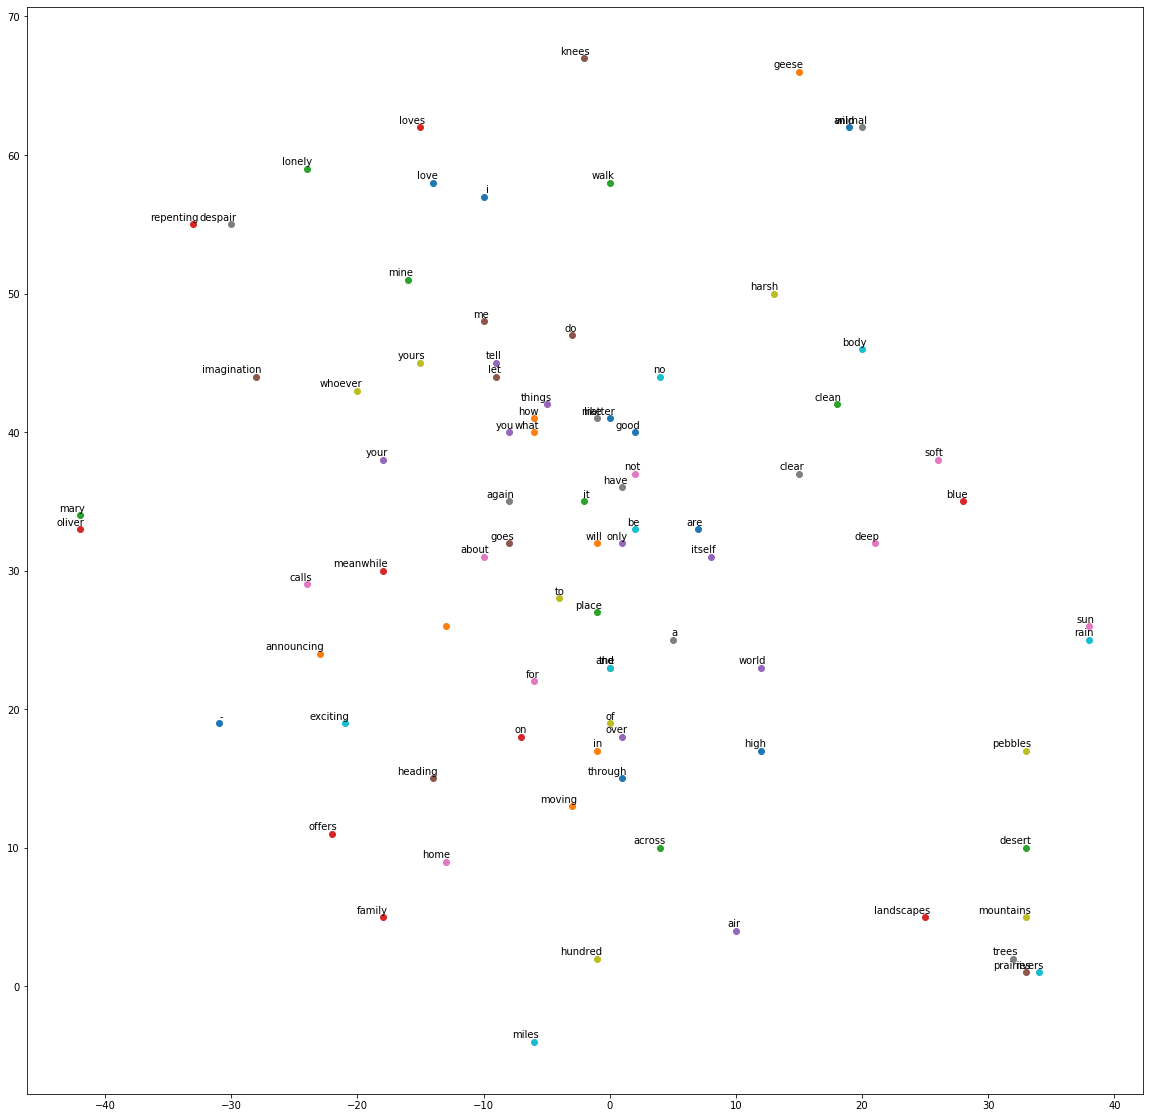

In [109]:
tsne_plot(model)

In [110]:
output = {}
for num, k in enumerate(reset_dict.keys()):
    output[num] = {
        'word' : k,
        'location' : [round(reset_dict[k][0],0),round(reset_dict[k][1],0)]
    }  

In [100]:
ranNum = reset_dict['mary'][0]
ranNum = round(ranNum, 0)
ranNum

-28.0

In [112]:
import json
with open('poem.json', 'w') as fp:
    json.dump(output, fp)

In [81]:
import math
def distance(word1,word2):
    word1 = word1.lower()
    word2 = word2.lower()
    x = reset_dict[word2][0] - reset_dict[word1][0] 
    y = reset_dict[word2][1] - reset_dict[word1][1] 
    dist = math.hypot(x,y)
    return dist

In [93]:
distance('matter','like')

0.37601182894770496

In [111]:
output

{0: {'word': 'wild', 'location': [19.0, 62.0]},
 1: {'word': 'geese', 'location': [15.0, 66.0]},
 2: {'word': 'mary', 'location': [-42.0, 34.0]},
 3: {'word': 'oliver', 'location': [-42.0, 33.0]},
 4: {'word': 'you', 'location': [-8.0, 40.0]},
 5: {'word': 'do', 'location': [-3.0, 47.0]},
 6: {'word': 'not', 'location': [2.0, 37.0]},
 7: {'word': 'have', 'location': [1.0, 36.0]},
 8: {'word': 'to', 'location': [-4.0, 28.0]},
 9: {'word': 'be', 'location': [2.0, 33.0]},
 10: {'word': 'good', 'location': [2.0, 40.0]},
 11: {'word': '', 'location': [-13.0, 26.0]},
 12: {'word': 'walk', 'location': [0.0, 58.0]},
 13: {'word': 'on', 'location': [-7.0, 18.0]},
 14: {'word': 'your', 'location': [-18.0, 38.0]},
 15: {'word': 'knees', 'location': [-2.0, 67.0]},
 16: {'word': 'for', 'location': [-6.0, 22.0]},
 17: {'word': 'a', 'location': [5.0, 25.0]},
 18: {'word': 'hundred', 'location': [-1.0, 2.0]},
 19: {'word': 'miles', 'location': [-6.0, -4.0]},
 20: {'word': 'through', 'location': [1.0, 